# Data Assignment 2

1) **Will Barmby (931150290)**
2) **Mike Markarian (931140514)**

for *Intermediate Macro*  
W&amp;M ECON 304  

## 1) 
### a.
- Get quarterly data on GDP and its components from 1960Q1-2025Q2:
    - Gross Domestic Product (FRED: GDP)
    - Personal consumption expenditures (FRED: PCEC)
    - Gross private domestic investment (FRED: GPDI)
    - Net exports of goods and services (FRED: NETEXP)
    - Government consumption expenditures and gross investment (FRED: GCE)

- For every quarter and each component $X$ (e.g., consumption, investment, etc...), calculate its percentage share of GDP, $100X_t/Y_t$, where $Y$ is real GDP.

- Plot the shares of GDP for consumption, investment, government spending, and net exports (hint: it's probably easiest to read four separate figures, or subplots, one for each component).


“Although the instructions say ‘real GDP,’ the FRED codes provided are nominal series, 
and shares are conventionally computed in nominal terms. That’s what we have done here.



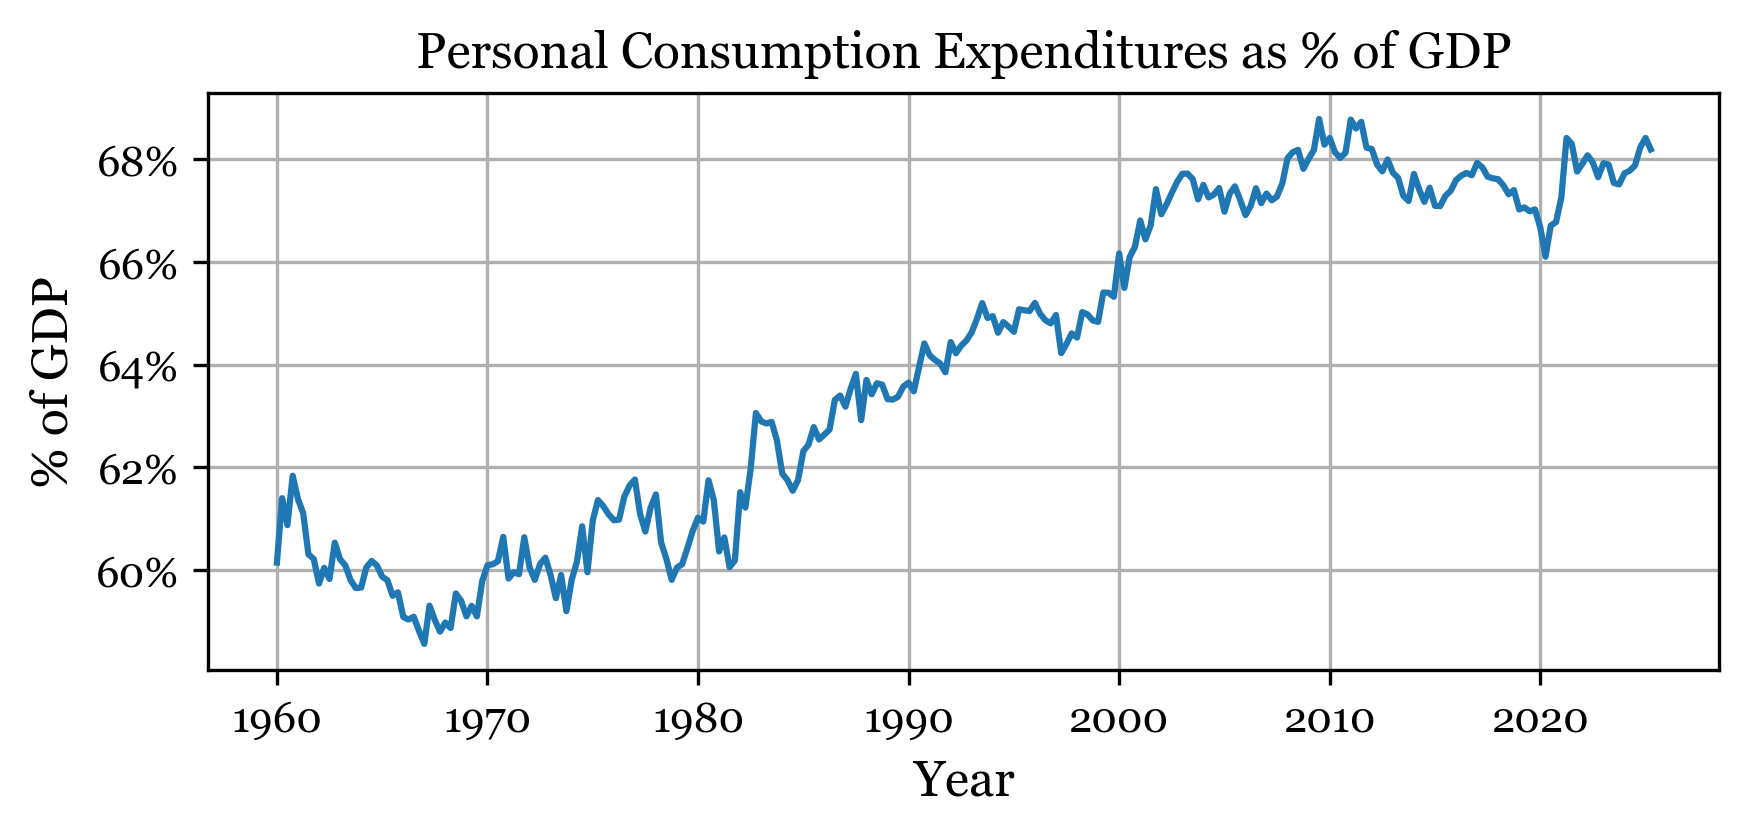

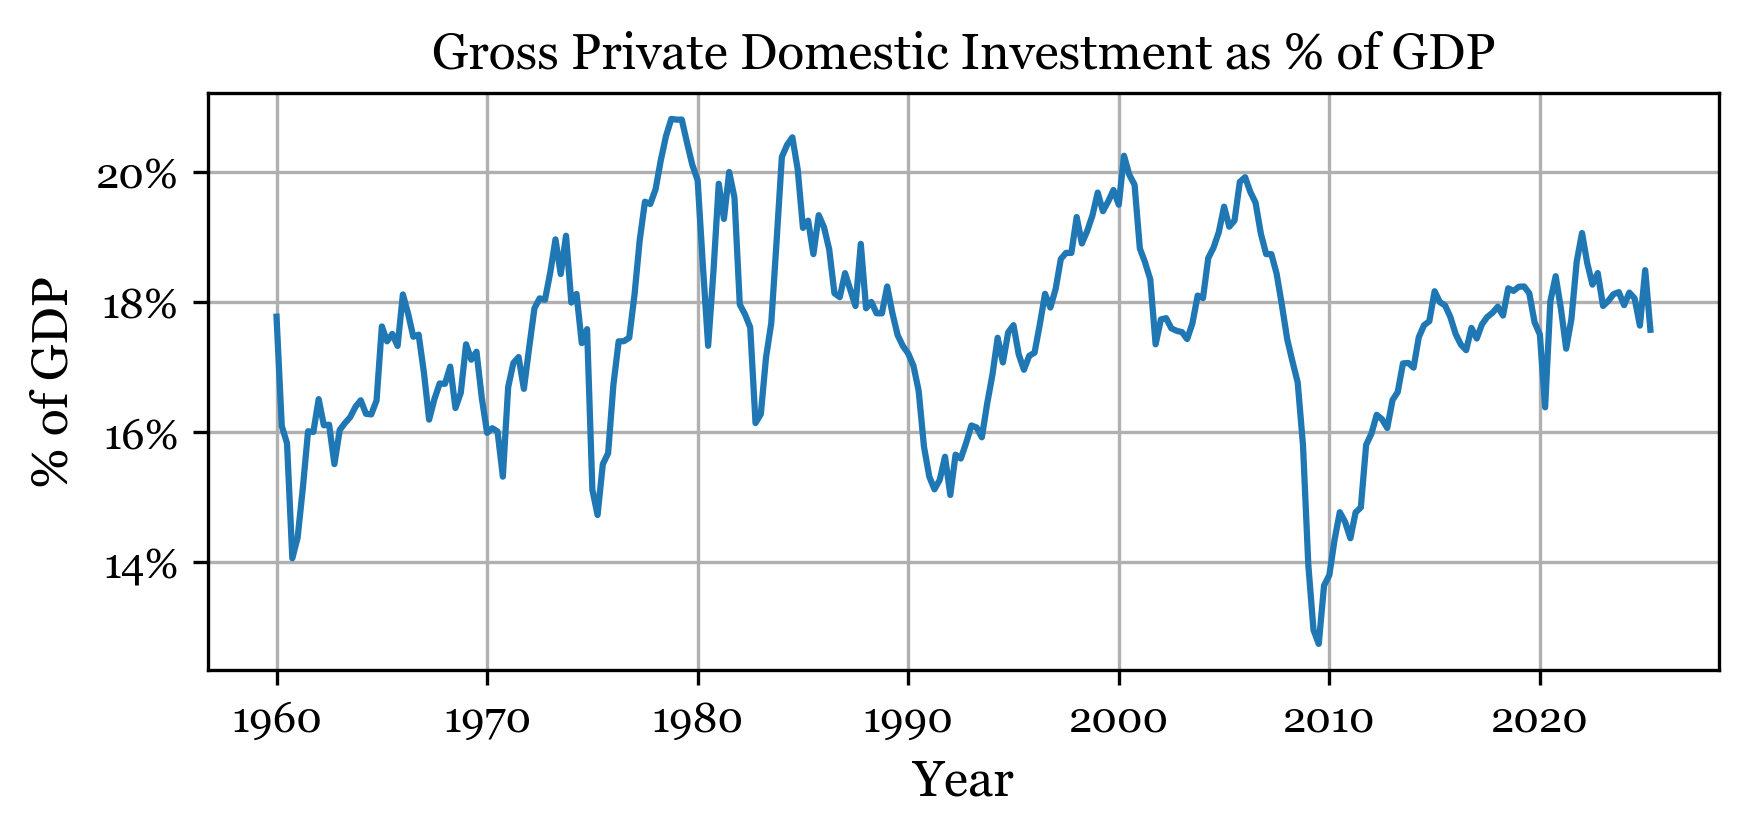

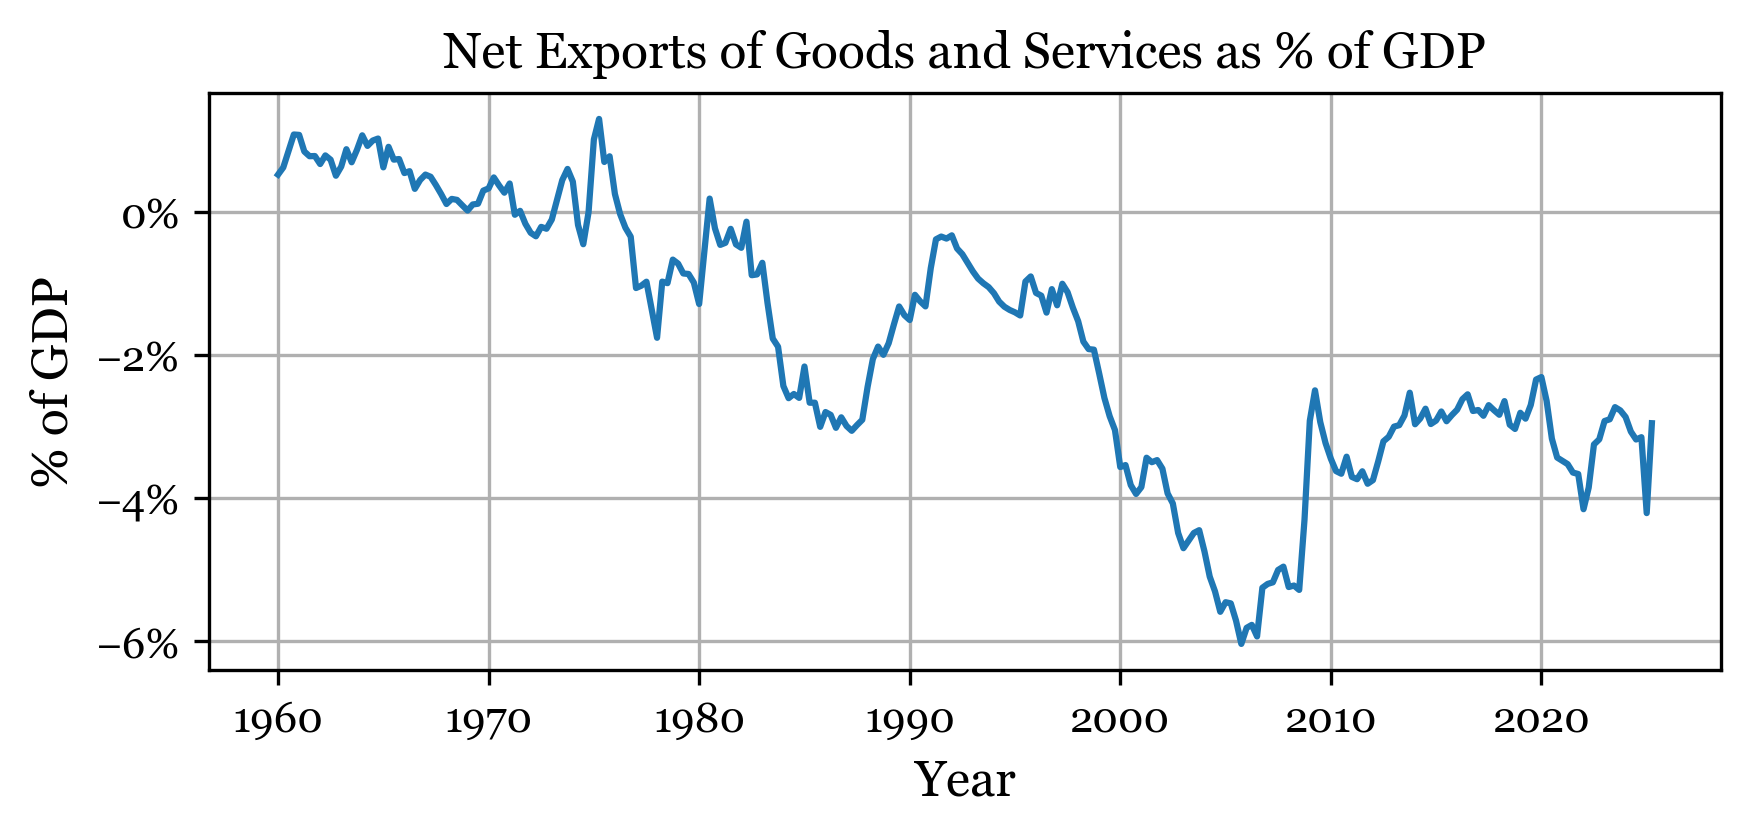

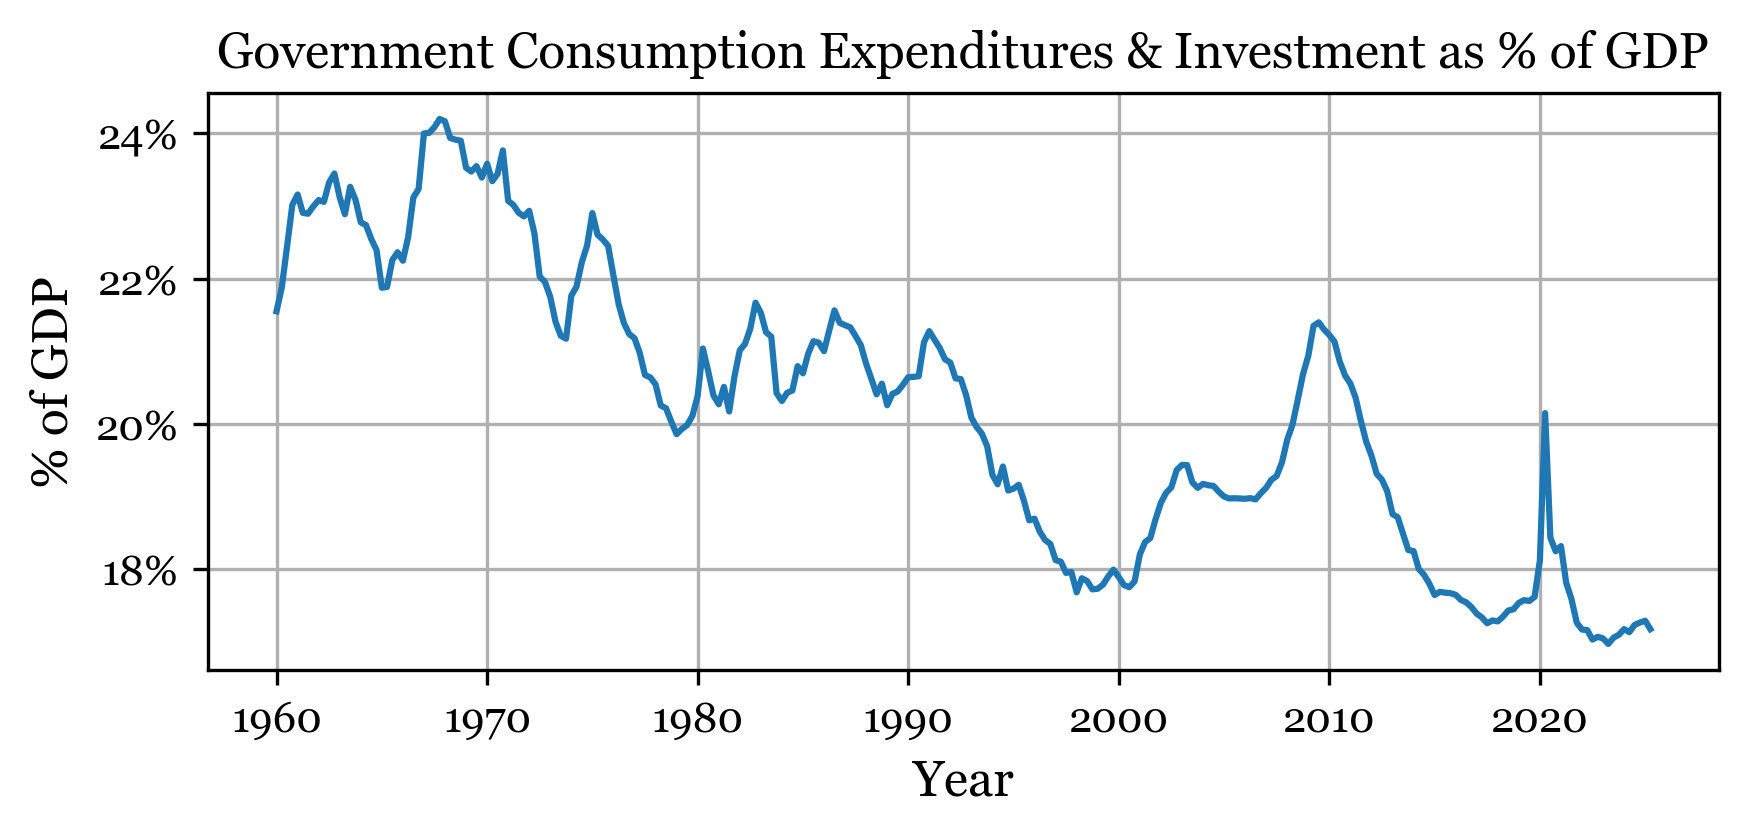

In [25]:
import importlib, utils
utils = importlib.reload(utils)
import pandas as pd
from fredapi import Fred
from config import FRED_API_KEY

fred = Fred(api_key=FRED_API_KEY)
start_date = '1960-01-01'
end_date = '2025-06-30'

series_dict = {
    'GDP'   : 'Gross Domestic Product',
    'PCEC'  : 'Personal Consumption Expenditures',
    'GPDI'  : 'Gross Private Domestic Investment',
    'NETEXP': 'Net Exports of Goods and Services',
    'GCE'   : 'Government Consumption Expenditures & Investment'
}

df = pd.DataFrame()
for code in series_dict:
    df[code] = fred.get_series(code, observation_start=start_date, observation_end=end_date)

# Compute % shares
df_pct = pd.DataFrame()
for code in series_dict:
    df_pct[code] = df[code] / df['GDP'] * 100

# Loop through components (excluding GDP itself)
pre_statement = """
“Although the instructions say ‘real GDP,’ the FRED codes provided are nominal series, 
and shares are conventionally computed in nominal terms. That’s what we have done here.
"""
print(pre_statement)
for code, label in series_dict.items():
    if code != 'GDP':  # skip GDP since its share is 100 by definition
        utils.plot_dataframe_series(
            df_pct,
            columns=[code],
            title=f"{label} as % of GDP",
            ylabel="% of GDP",
            xlabel="Year"
        )

# df.drop(columns=['GDP'], inplace=True)


### b.

What long-run trends do you notice for each component's share of GDP? Briefly, what do you think are some reasons for those trends?

In the long-run, we've seen consumption steadily take up a greater share of total GDP, moving from less than 60% in the late 1960s to almost 70% now. Government spending as % of GDP  has declined, though not as steadily as consumption has risen. This decline is somewhat surprising in light of government having spent almost $7T in FY2025 thus far. We suppose that the consistent increases in government spending might not be suggest by this graph because transfer payments are not factored in. This would exclude many government spending programs (such as Social Security) and debt repayments, which make up the bulk of the national budget. 


Investments as % of GDP seem to rise and fall with expansions and recessions respectively (see the enormous decline after 2008/9), whereas consumption remains pretty stready throughout. This is likely because corporations are slightly more inelastic than consumers (meaning we won't see the same gains that consumers did in a QE-driven market post-2008). But during recessions, however, increased uncertaintly likely led to investment slowdowns (as we see with the nearly 7% drop in 2008).


Net exports have decreased slightly, while private investment slightly increased - but both changes pale in comparision with consistent rise in consumption's share and government expenditures' relative decline. 



## 2) 

Each news release, the BEA reports the contributions to the real GDP growth rate (e.g., see [BEA News Release](https://www.bea.gov/sites/default/files/2025-07/gdp2q25-adv.pdf), Table 2). For any quarter $t$, a formula for decomposing the contributions to the real GDP growth rate is given by:

$$
        g_{Y,t} = g_{C,t}s_{C,t-1} + g_{I,t}s_{I,t-1} + g_{G,t}s_{G,t-1} + g_{NX,t}s_{NX,t-1}
$$

where $g_{X,t} \equiv 400(X_t/X_{t-1} - 1)$ is an annualized quarterly growth rate of some GDP component, $X$, and $s_{X,t-1} \equiv X_{t-1}/Y_{t-1}$ is $X$'s share of GDP at time $t-1$.

### a.

For 2015Q2 to 2025Q2, plot the contributions, $g_{X,t}s_{X,t-1}$, of consumption, private investment, government spending, and net exports to real GDP growth. Be sure to include a legend.

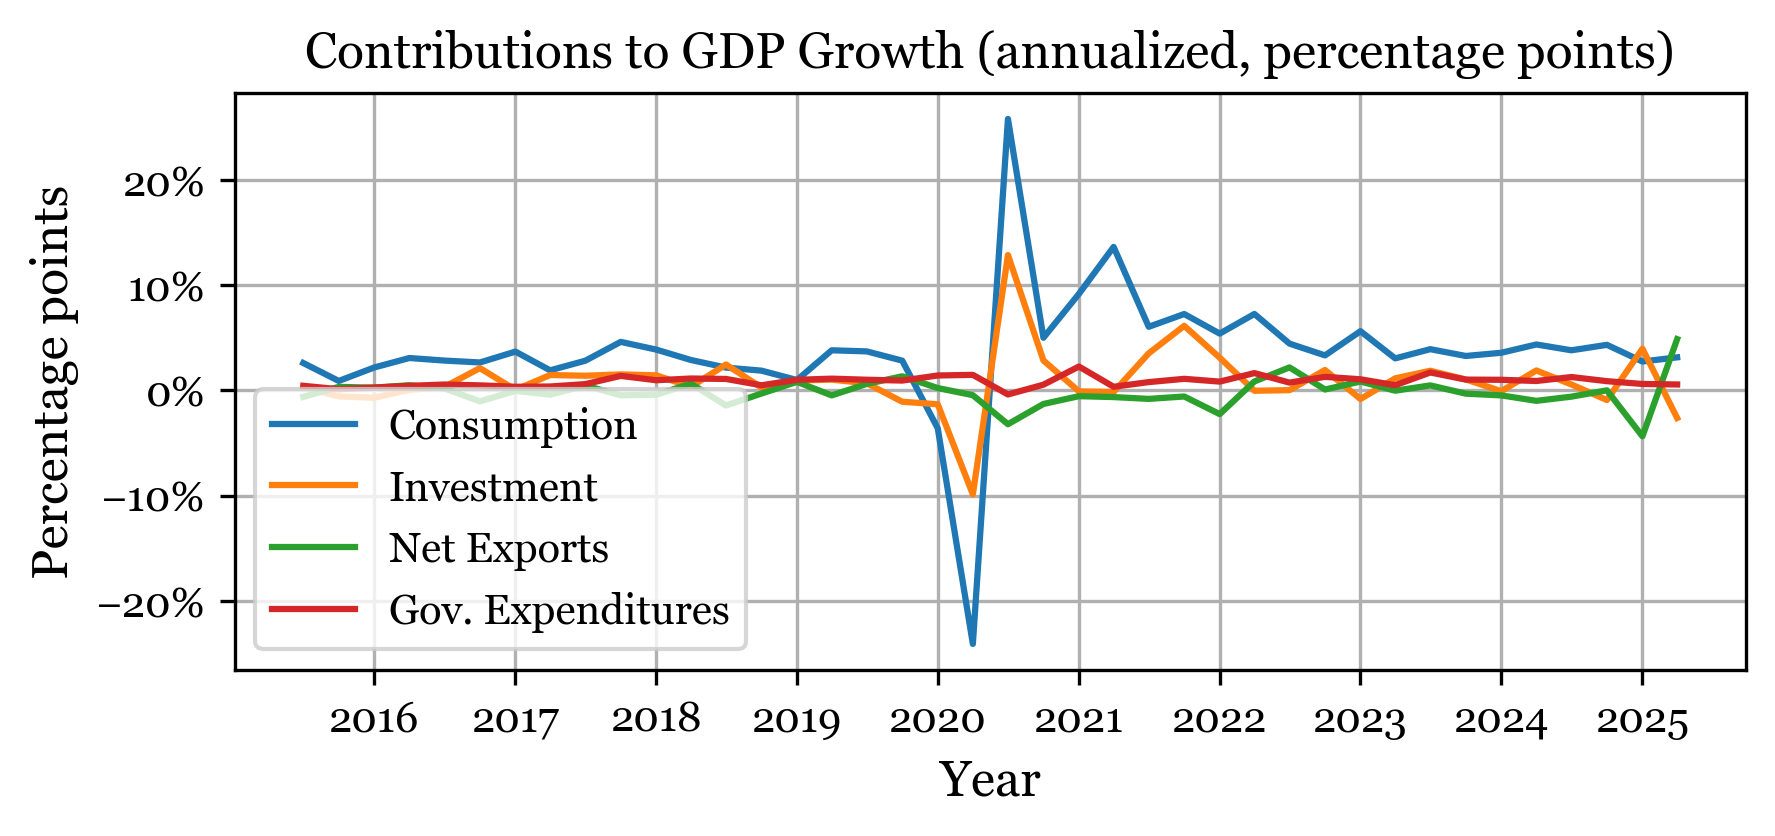

In [40]:
import importlib, utils
utils = importlib.reload(utils)
start = '2015-04-01'
end = '2025-06-30'
df_contribs = df.loc[start:end]
df_contribs = 400 * df_contribs.pct_change().dropna()
df_gdp_shares = df.loc[start:end].shift(1).div(df['GDP'].shift(1), axis=0)
df_gdp_shares = df_gdp_shares.dropna()
contribs = df_contribs * df_gdp_shares
contribs = contribs.drop(columns=['GDP'])
contribs = contribs.rename(columns={
    'PCEC': 'Consumption',
    'GPDI': 'Investment',
    'GCE': 'Gov. Expenditures',
    'NETEXP': 'Net Exports'
})
utils.plot_dataframe_series(
    contribs,
    columns=contribs.columns,
    title="Contributions to GDP Growth (annualized, percentage points)",
    ylabel="Percentage points",
    xlabel="Year"
)


### b.

Which component(s) are keeping recent (since 2020) GDP growth rates positive? Is that result surprising to you? Why or why not?

Personal consumption has largely kept the post-COVID economy afloat. This makes sense. Between low rates and robust monetary stimulus consumers and investors alike have been awash in free money - and spent much of it (though not as much as policymakers hoped). Elevated inflation levels also back up this theory, as increased consumer spending would drive up those numbers as well (which occurred). Government spending has also remained stable, though nowhere near consumption's elevated levels. Both investment and net exports, however, have been turbulent in recent years, and only time will tell if the Trump administration's tariffs will have an effect beyond the mass importation in 2025 Q1 and subsequent trade surplus in Q2.